In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Explore our Dataset 

In [2]:
# load from seaborn
mpg = sns.load_dataset("mpg").dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
# round all our values
mpg.describe().applymap(round)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392,392,392,392,392,392,392
mean,23,5,194,104,2978,16,76
std,8,2,105,38,849,3,4
min,9,3,68,46,1613,8,70
25%,17,4,105,75,2225,14,73
50%,23,4,151,94,2804,16,76
75%,29,8,276,126,3615,17,79
max,47,8,455,230,5140,25,82


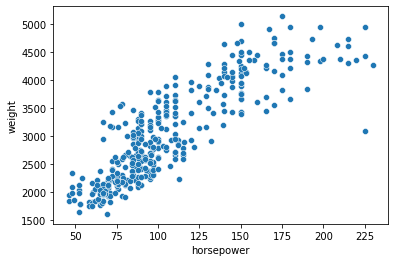

In [4]:
# visualize potential correlation
sns.scatterplot(x='horsepower', y='weight', data=mpg);

## Linear Regression time
[Least Square vis demo](https://setosa.io/ev/ordinary-least-squares-regression/)

### Visually

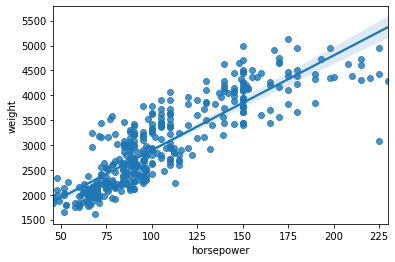

In [5]:
# Visually
sns.regplot(x='horsepower', y='weight', data=mpg);

In [6]:
# Correlation will show us the relationship -- positive or negative between 2 variables
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [7]:
##r-squared (r2) is often preferred, from [0 to 1]
print('R-Squared = ', (mpg.corr()['weight']['horsepower'])**2)

R-Squared =  0.7474254996898221


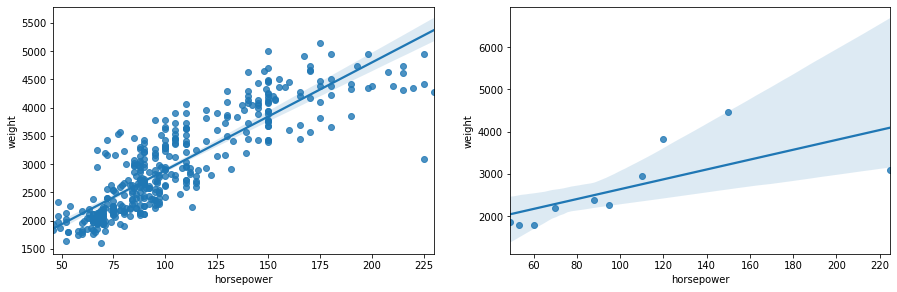

In [8]:
# Size matters
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='horsepower', y='weight', data=mpg, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='horsepower', y='weight', data=mpg.sample(10, random_state=6), ci=95);

### Stats Models

In [9]:
# DO NOT USE - DOES NOT GIVE INTERCEPT
# import statsmodels.api as sm
# Y = mpg['weight']
# X = mpg['horsepower']
# model = sm.OLS(Y, X).fit() # Finds the best beta
# print(model.params)

In [10]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'weight ~ horsepower', data=mpg).fit()
print('R2', model.rsquared)
print(model.params)
model.predict(mpg['horsepower']).head()


R2 0.7474254996898198
Intercept     984.500327
horsepower     19.078162
dtype: float64


0    3464.661329
1    4132.396983
2    3846.224560
3    3846.224560
4    3655.442944
dtype: float64

### R2 math

In [11]:
mpg = mpg[['weight', 'horsepower']].copy()
# Create a column with model predictions
mpg['model_predict'] = model.predict(mpg['horsepower']) 
# Create a column with the mean of Y
mpg['mean_predict'] = mpg['weight'].mean()
# Calculate actuals variance to both mean and prediction
mpg['v_to_mean'] = (mpg['weight'] - mpg['mean_predict'])**2
mpg['v_to_model'] = (mpg['weight'] - mpg['model_predict'])**2
# round everything
mpg = mpg.applymap(round)
# get our total variances
total_v_to_mean = mpg.v_to_mean.sum()
total_v_to_model = mpg.v_to_model.sum()

display(mpg.head())
print('Total variance to Mean: ', '{:,}'.format(total_v_to_mean))
print('Total variance to Model: ', '{:,}'.format(total_v_to_model))
print('Total Variance in y explained by model -- R2: ', 1 - total_v_to_model / total_v_to_mean) 

,weight,horsepower,model_predict,mean_predict,v_to_mean,v_to_model
0,3504,130,3465,2978,277114,1548
1,3693,165,4132,2978,511820,193070
2,3436,150,3846,2978,210145,168284
3,3433,150,3846,2978,207404,170755
4,3449,140,3655,2978,222233,42619


Total variance to Mean:  282,100,515
Total variance to Model:  71,251,399
Total Variance in y explained by model -- R2:  0.7474254912296066


In [12]:
# P value most important.  Is it possible to get 19 if true slope is actually 0 (H0)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Tue, 25 May 2021   Prob (F-statistic):          1.36e-118
Time:                        19:13:48   Log-Likelihood:                -2929.9
No. Observations:                 392   AIC:                             5864.
Df Residuals:                     390   BIC:                             5872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    984.5003     62.514     15.748      0.0

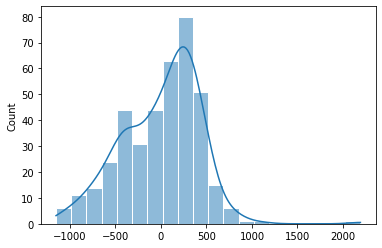

In [13]:
# check residuals for aprox normal distribution
residuals = mpg['model_predict']-mpg['weight']
sns.histplot(residuals, kde=True, edgecolor='w');

Text(0, 0.5, 'Residual weight')

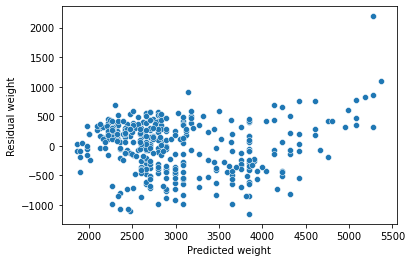

In [14]:
# Check with Residuals vs. Fitted scatterplot
sns.scatterplot(x=mpg['model_predict'], y=residuals)
plt.xlabel('Predicted weight')
plt.ylabel('Residual weight')